In [1]:
from sklearn import datasets

In [24]:
boston=datasets.load_boston()
X=boston.data;
Y=boston.target;

<built-in method values of Bunch object at 0x0000023AFD85E130>


In [111]:
import pandas as pd
df = pd.DataFrame(X)
#print(boston.feature_names)
df.columns=boston.feature_names
# df["Age_Age"]=df["AGE"]**2;
# X2=df.values;
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Age_Age
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,5493.309545
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,3449.600164
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,8.410000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,2027.252500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,6006.290000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,8850.107500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,10000.000000


In [119]:
#including all two degree fatures
arr=boston.feature_names

for x in arr:
    for y in arr:
        index=x+"*"+y;
        df[index]=df[x]*df[y];
X2=df.values

In [120]:
#Now we will Split data set --> One for training and one for testing
#the spliting should be random-->we dont need to write the splitting function as sklearn probvide it
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,random_state=0) #by default the splitting is 1:3 we can change it by passing argument
X2_train,X2_test,Y2_train,Y2_test=model_selection.train_test_split(X2,Y,random_state=0)

#Now that we have split the data now we need to import our linear regression algorithm

In [121]:
from sklearn.linear_model import LinearRegression
#create our algorithm object
alg1=LinearRegression()
alg2=LinearRegression()
#Now as our algorithm is ready lets now train it

In [122]:
alg1.fit(X_train,Y_train)
alg2.fit(X2_train,Y2_train)

LinearRegression()

In [129]:
Y_pred = alg1.predict(X_test)
train_score = alg1.score(X_train, Y_train)
test_score = alg1.score(X_test, Y_test)
print("Train Score: ", train_score)
print("Test Score: ", test_score)

train2_score = alg2.score(X2_train, Y2_train)
test2_score = alg2.score(X2_test, Y2_test)
print("Train2 Score: ", train2_score)
print("Test2 Score: ", test2_score)

#Note-->We can see that when we include all the two degree feature--->we notice overfitting-->perform very well on train data i.e memeorizing it-->but not performing so good on test data

Train Score:  0.7697699488741149
Test Score:  0.6354638433202129
Train2 Score:  0.9520519609032728
Test2 Score:  0.6074721959797034


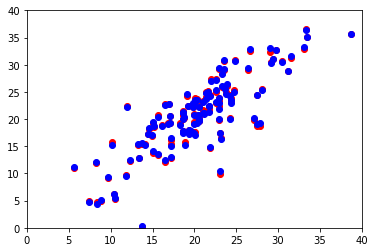

In [124]:
import matplotlib.pyplot as plt
plt.plot(Y_test,Y_pred,"ro")
plt.plot(Y2_test,Y2_pred,"bo")
plt.axis([0,40,0,40])
plt.show()